In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlqueries_unc_preeclampsia import *
import os
import dotenv

### 1. load bp data

In [2]:
dotenv.load_dotenv()
connection_string = f"mssql+pymssql://@{os.getenv('HOSTNAME')}/{os.getenv('DATABASE')}"
engine = sqlalchemy.create_engine(connection_string)
sql_string = f'''
select
    *
from {os.getenv('DATABASE')}.{os.getenv('SCHEMA')}.rpt_preeclampsia__bp_time_series
'''
dat = pd.read_sql(sql_string, con=engine)

In [3]:
dat_with_chtn_any = dat[dat['chtn_any']==1].groupby(['cp_anypree_sf', 'preg_weeks'])[['systolic', 'diastolic']].agg(['mean', 'std']).reset_index()
dat_without_chtn_any = dat[dat['chtn_any']==0].groupby(['cp_anypree_sf', 'preg_weeks'])[['systolic', 'diastolic']].agg(['mean', 'std']).reset_index()
dat_with_chtn_any

cp_anypree_sf preg_weeks    systolic             diastolic           
                                   mean        std       mean        std
0              0          0  128.558730  12.773853  81.711111  10.406112
1              0          1  132.850000  12.127147  85.423529  10.326268
2              0          2  134.922213  16.603619  81.579593  11.099671
3              0          3  134.723479  13.177116  83.206283  10.467456
4              0          4  133.808081  13.701143  82.411247   9.692065
5              0          5  133.435935  13.875143  80.530002  10.619217
6              0          6  132.022474  12.330569  79.184679   9.427989
7              0          7  131.317271  11.424811  78.804876   9.478540
8              0          8  130.975888  11.372798  78.254095   9.642656
9              0          9  129.848303  13.163395  78.488649   9.457010
10             0         10  130.938227  12.534412  78.827381   9.423091
11             0         11  130.612152  13.126627  78.072398  10.011374
12             0         12  128.978635  12.802282  78.005488   9.389981
13             0         13  130.603636  13.105201  77.783561  10.464828
14             0         14  128.874236  13.022790  76.462419   9.961369
15             0         15  128.739457  12.747713  76.138928  10.976244
16             0         16  128.094376  11.572233  77.079724   9.509319
17             0         17  128.092273  11.899499  76.671172   8.470802
18             0         18  127.257561  11.391275  75.447061   9.323002
19             0         19  128.848113  12.872248  75.934191   8.963748
20             0         20  127.665036  13.300778  74.859414   8.916890
21             1          0  137.648889  23.807345  84.377778  15.253346
22             1          1  135.110613  17.991142  87.895905  16.396053
23             1          2  134.647619  15.603111  83.536128  12.568733
24             1          3  133.893064  19.603920  83.033755  10.578046
25             1          4  139.712069  19.319739  88.247628  12.631200
26             1          5  139.137808  14.948589  85.509397  12.611050
27             1          6  134.472284  14.583540  81.832217  10.658091
28             1          7  135.224631  14.539153  80.936630  10.475104
29             1          8  134.146313  14.061859  80.432796  11.557137
30             1          9  137.376271  13.380018  81.857347  10.789518
31             1         10  136.733987  11.409715  81.368161  10.764289
32             1         11  134.027212  12.123809  80.018494  10.044752
33             1         12  135.399615  13.522220  80.630437   9.625358
34             1         13  135.829792  14.620755  80.501902  12.440233
35             1         14  135.364135  13.793043  79.353131   9.585145
36             1         15  134.063396  13.567004  78.728046  10.956099
37             1         16  134.157513  12.241287  81.122539  10.381137
38             1         17  132.364742  14.974078  78.424143  10.671101
39             1         18  132.124090  13.191791  78.520299  10.713744
40             1         19  133.591587  12.519681  78.102330  11.564442
41             1         20  132.617597  13.926677  78.668490  11.214709

Text(0.5, 0.98, 'chtn_any=1')

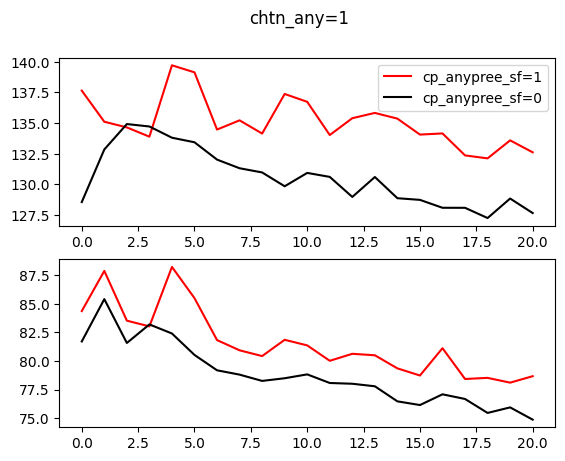

In [4]:
from matplotlib import pyplot as plt

idx = (dat_with_chtn_any['cp_anypree_sf'] == 1)
fig, axes = plt.subplots(2,1)
axes = axes.flatten()
axes[0].plot(dat_with_chtn_any.loc[idx, 'preg_weeks'], dat_with_chtn_any.loc[idx, ('systolic', 'mean')], 'r-', label='cp_anypree_sf=1')
axes[0].plot(dat_with_chtn_any.loc[~idx, 'preg_weeks'], dat_with_chtn_any.loc[~idx, ('systolic', 'mean')], 'k-', label='cp_anypree_sf=0')
axes[1].plot(dat_with_chtn_any.loc[idx, 'preg_weeks'], dat_with_chtn_any.loc[idx, ('diastolic', 'mean')], 'r-')
axes[1].plot(dat_with_chtn_any.loc[~idx, 'preg_weeks'], dat_with_chtn_any.loc[~idx, ('diastolic', 'mean')], 'k-')
axes[0].legend()
plt.suptitle('chtn_any=1')

Text(0.5, 0.98, 'chtn_any=0')

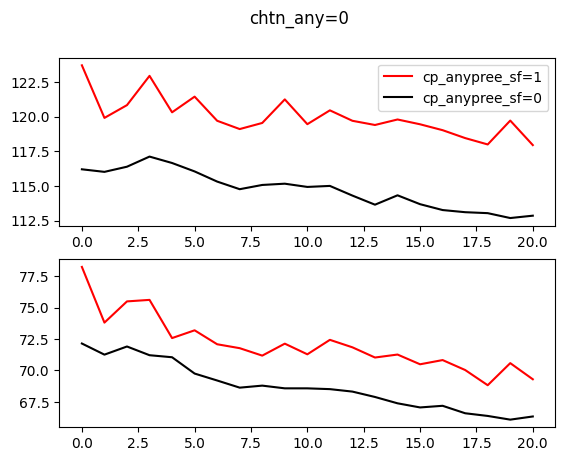

In [5]:
idx = (dat_without_chtn_any['cp_anypree_sf'] == 1)
fig, axes = plt.subplots(2,1)
axes = axes.flatten()
axes[0].plot(dat_without_chtn_any.loc[idx, 'preg_weeks'], dat_without_chtn_any.loc[idx, ('systolic', 'mean')], 'r-', label='cp_anypree_sf=1')
axes[0].plot(dat_without_chtn_any.loc[~idx, 'preg_weeks'], dat_without_chtn_any.loc[~idx, ('systolic', 'mean')], 'k-', label='cp_anypree_sf=0')
axes[1].plot(dat_without_chtn_any.loc[idx, 'preg_weeks'], dat_without_chtn_any.loc[idx, ('diastolic', 'mean')], 'r-')
axes[1].plot(dat_without_chtn_any.loc[~idx, 'preg_weeks'], dat_without_chtn_any.loc[~idx, ('diastolic', 'mean')], 'k-')
axes[0].legend()
plt.suptitle('chtn_any=0')

Text(0.5, 1.0, 'chtn_any=1')

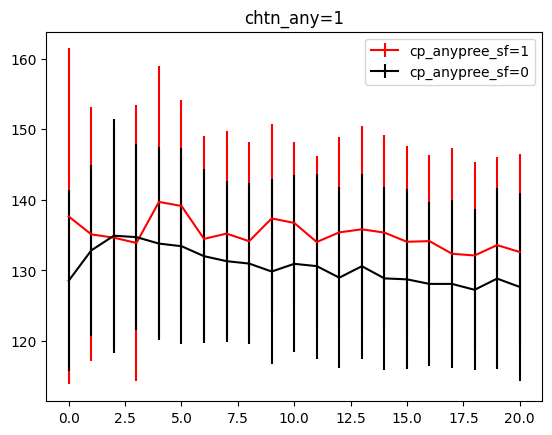

In [6]:
from matplotlib import pyplot as plt

idx = (dat_with_chtn_any['cp_anypree_sf'] == 1)
plt.errorbar(dat_with_chtn_any.loc[idx, 'preg_weeks'], 
                dat_with_chtn_any.loc[idx, ('systolic', 'mean')],
                dat_with_chtn_any.loc[idx, ('systolic', 'std')],
                fmt='r-', label='cp_anypree_sf=1')
plt.errorbar(dat_with_chtn_any.loc[~idx, 'preg_weeks'], 
                dat_with_chtn_any.loc[~idx, ('systolic', 'mean')],
                dat_with_chtn_any.loc[~idx, ('systolic', 'std')],
                fmt='k-', label='cp_anypree_sf=0')
plt.legend()
plt.title('chtn_any=1')